In [1]:
import numpy as np
import sklearn as sks
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("host_train.csv")
tsneV2 = pd.read_csv("tsneV2.csv")
tsne10p = pd.read_csv("tsne10p.csv")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# df = pd.read_csv("/content/drive/MyDrive/KK/host_train.csv")
# Tsne = pd.read_csv("/content/drive/MyDrive/KK/TSNE.csv",sep=';')
# df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
pd.set_option("max_rows", None)
df.isnull().sum()

case_id                                 0
Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

In [5]:
df.isnull().mean() * 100

case_id                              0.000000
Hospital                             0.000000
Hospital_type                        0.000000
Hospital_city                        0.000000
Hospital_region                      0.000000
Available_Extra_Rooms_in_Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility                        0.000000
Bed_Grade                            0.035486
patientid                            0.000000
City_Code_Patient                    1.423197
Type of Admission                    0.000000
Illness_Severity                     0.000000
Patient_Visitors                     0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay_Days                            0.000000
dtype: float64

In [6]:
df['City_Code_Patient'].mode()

0    8.0
dtype: float64

In [9]:
df.fillna({'City_Code_Patient':df.mode()['City_Code_Patient'][0], 'Bed_Grade':df.mode()['Bed_Grade'][0]}, inplace=True)

In [10]:
df.isnull().mean() * 100

Hospital                             0.0
Hospital_type                        0.0
Hospital_city                        0.0
Hospital_region                      0.0
Available_Extra_Rooms_in_Hospital    0.0
Department                           0.0
Ward_Type                            0.0
Ward_Facility                        0.0
Bed_Grade                            0.0
City_Code_Patient                    0.0
Type of Admission                    0.0
Illness_Severity                     0.0
Patient_Visitors                     0.0
Age                                  0.0
Admission_Deposit                    0.0
dtype: float64

In [9]:
df.describe()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,1.256841,4.771717,0.778098,3.197627,2.625585,65747.579472,7.262506,3.284099,4880.749392
std,91925.276848,8.633755,1.535712,3.102535,0.752527,1.168171,0.873070,37979.936440,4.712210,1.764061,1086.776254
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,1.000000,5.000000,1.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,2.000000,7.000000,1.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,6.000000,13.000000,2.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [10]:
df.describe(include=['O'])

,Department,Ward_Type,Ward_Facility,Type of Admission,Illness_Severity,Age,Stay_Days
count,318438,318438,318438,318438,318438,318438,318438
unique,5,6,6,3,3,10,11
top,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,249486,127947,112753,152261,175843,63749,87491


In [4]:
from sklearn.preprocessing import LabelEncoder
cats = [c for c in df.columns if df[c].dtypes=='object']
for col in cats:
    le = LabelEncoder() 
    df[col]  = le.fit_transform(df[col].astype(str)) 
    
le = LabelEncoder()
df.Stay_Days = le.fit_transform(df.Stay_Days.astype(str))
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'0': 0, '1': 1, '10': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10}


In [12]:
df['Illness_Severity']  = -1 * (df['Illness_Severity'] - 2)

In [13]:
df.head()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,2,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,2,2,5,5954.0,5
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,2,2,5,4745.0,4
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,2,2,5,7272.0,5
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,2,2,5,5558.0,5


In [14]:
target = df['Stay_Days']
df = df.drop(['case_id','Hospital','Hospital_type','Hospital_city','Hospital_region','Department','Ward_Type','Ward_Facility','patientid','City_Code_Patient'], axis=1)
df.head()

,Available_Extra_Rooms_in_Hospital,Bed_Grade,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,3,2.0,0,2,2,5,4911.0,0
1,2,2.0,1,2,2,5,5954.0,5
2,2,2.0,1,2,2,5,4745.0,4
3,2,2.0,1,2,2,5,7272.0,5
4,2,2.0,1,2,2,5,5558.0,5


<AxesSubplot:>

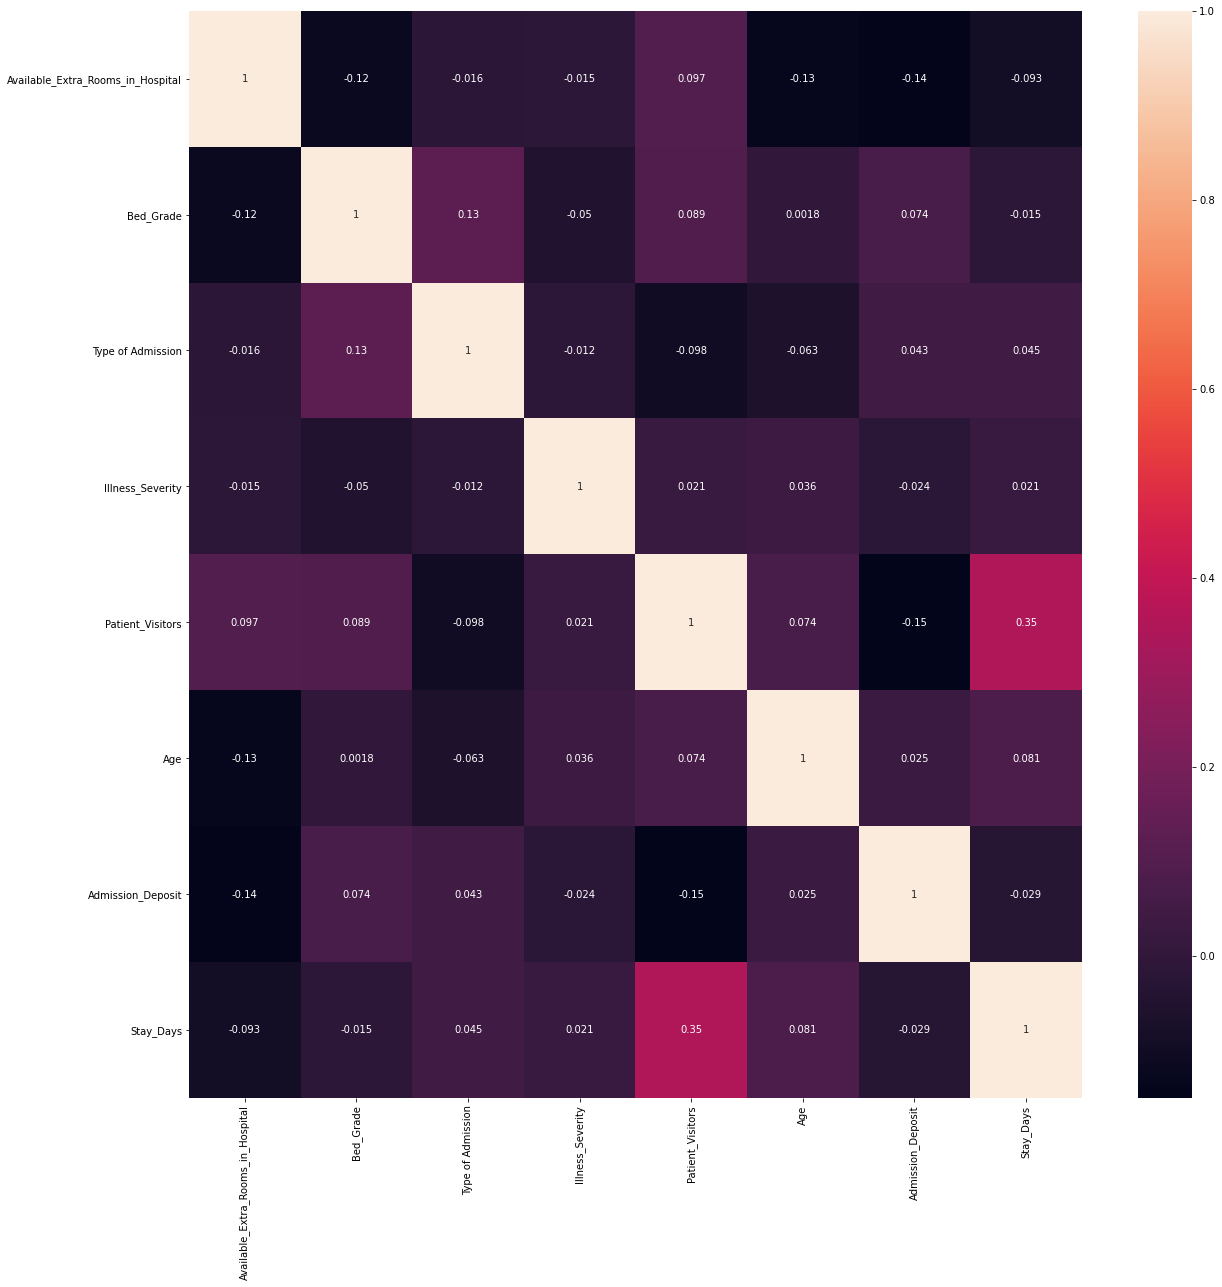

In [15]:
plt.figure(figsize=(20,20))
corr= df.corr() 
sns.heatmap(corr,annot=True)

In [6]:
df = df.drop(['case_id','patientid'], axis=1)

In [5]:
target = df['Stay_Days']
df = df.drop(['Stay_Days'], axis=1)
df.head()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normal = scaler.fit_transform(df)

In [19]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,random_state=1).fit_transform(normal)
X_embedded.shape
tsneDropped = pd.DataFrame(X_embedded, columns = ['x','y'])
tsneDropped.to_csv('tsneV2.csv')

In [ ]:
# from sklearn.manifold import TSNE
# X_embedded = TSNE(n_components=2,random_state=1).fit_transform(normal)
# X_embedded.shape

In [ ]:
Tsne.rename(index={0: "x", 1: "y"})

In [ ]:
Tsne.head()

,x,y
0,29.021671,-13.318918
1,-14.041949,-11.296715
2,-13.678065,19.821272
3,-39.025032,3.578819
4,-39.075264,3.459488


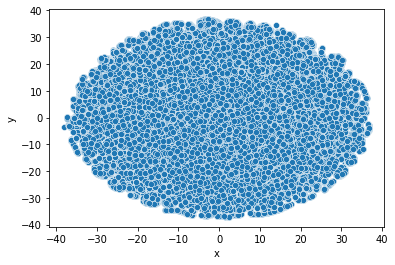

In [20]:
snsTest = pd.DataFrame(tsneDropped,columns=['x','y'])
sns.scatterplot(data=snsTest,x='x',y='y')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(normal)
X_embeddedPCA = pca.transform(normal)

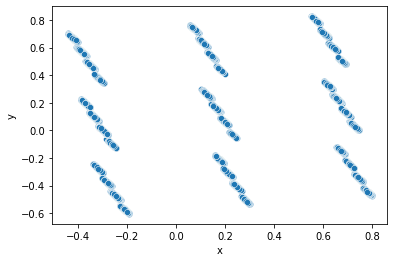

In [ ]:
snsTest = pd.DataFrame(X_embeddedPCA,columns=['x','y'])
sns.scatterplot(data=snsTest,x='x',y='y')

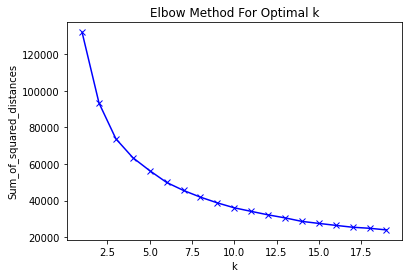

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k,random_state = 1)
    km = km.fit(normal)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn import metrics
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
  kmeans = KMeans(n_clusters=k,random_state = 1)
  kmeans.fit(normal)
  y_kmeans = kmeans.predict(normal)
  Sum_of_squared_distances.append(metrics.silhouette_score(normal, y_kmeans))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
X_embedded = Tsne.to_numpy()

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(normal)
y_kmeans = kmeans.predict(normal)
whatif = df
whatif['clusters'] = y_kmeans
whatif['stay_day'] = target
# plt.figure(figsize=(10,10))
# plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_kmeans, s=50, cmap='viridis')
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [16]:
from sklearn import metrics 
print(metrics.silhouette_score(normal, y_kmeans))

0.1727251438773031


In [17]:
whatif.to_csv('fullnodrop.csv',index=False)

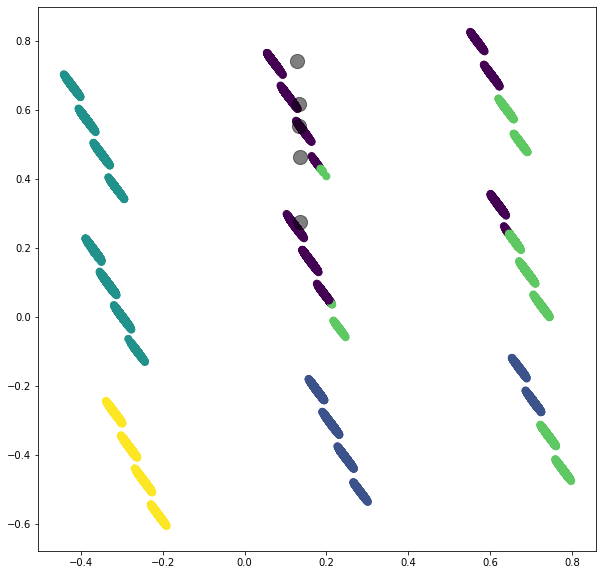

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_embeddedPCA[:, 0], X_embeddedPCA[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
df['x'] = Tsne['x']
df['y'] = Tsne['y']
df.head()

In [ ]:
predict = y_kmeans

In [ ]:
ans = df 
ans['kmeans_clust'] = predict 

In [ ]:
ans.head()

,Available_Extra_Rooms_in_Hospital,Bed_Grade,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,kmeans_clust
0,3,2.0,0,2,2,5,4911.0,3
1,2,2.0,1,2,2,5,5954.0,3
2,2,2.0,1,2,2,5,4745.0,3
3,2,2.0,1,2,2,5,7272.0,3
4,2,2.0,1,2,2,5,5558.0,3


In [ ]:
ans.to_csv('kmeans.csv')


In [ ]:
nochange = pd.read_csv("/content/drive/MyDrive/KK/host_train.csv")
nochange['kmeans_clust'] = predict 
nochange.to_csv('kmeans_nodrop.csv')

In [ ]:
from sklearn import metrics
print(metrics.silhouette_score(normal, y_kmeans))

0.28220308879826944


In [ ]:
km = KMeans(n_clusters=10,random_state = 1)
km = km.fit(normal)
kmmeans = km.predict(normal)
print(metrics.silhouette_score(normal, kmmeans))

0.30751369822867547


In [ ]:
# import numpy as np

# from matplotlib import pyplot as plt
# from scipy.cluster.hierarchy import dendrogram
# from sklearn.datasets import load_iris
# from sklearn.cluster import AgglomerativeClustering


# def plot_dendrogram(model, **kwargs):
#     # Create linkage matrix and then plot the dendrogram

#     # create the counts of samples under each node
#     counts = np.zeros(model.children_.shape[0])
#     n_samples = len(model.labels_)
#     for i, merge in enumerate(model.children_):
#         current_count = 0
#         for child_idx in merge:
#             if child_idx < n_samples:
#                 current_count += 1  # leaf node
#             else:
#                 current_count += counts[child_idx - n_samples]
#         counts[i] = current_count

#     linkage_matrix = np.column_stack([model.children_, model.distances_,
#                                       counts]).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)



# # setting distance_threshold=0 ensures we compute the full tree.
# model = AgglomerativeClustering(distance_threshold=0, linkage = "single",n_clusters=None)
# model.fit(normal)
# plt.figure(figsize=(10,10))
# plt.title('Hierarchical Clustering Dendrogram')
# # plot the top three levels of the dendrogram
# plot_dendrogram(model, truncate_mode='level', p=20)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()

In [18]:
tenP = df.sample(frac=0.1, random_state=1)

In [19]:
tenP.describe()

,Available_Extra_Rooms_in_Hospital,Bed_Grade,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit
count,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000
mean,3.193474,2.619112,0.784135,0.621499,3.287087,4.128941,4888.740548
std,1.174649,0.869950,0.690584,0.766099,1.782575,1.896885,1092.431786
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1841.000000
25%,2.000000,2.000000,0.000000,0.000000,2.000000,3.000000,4193.000000
50%,3.000000,3.000000,1.000000,0.000000,3.000000,4.000000,4751.000000
75%,4.000000,3.000000,1.000000,1.000000,4.000000,6.000000,5411.000000
max,24.000000,4.000000,2.000000,2.000000,32.000000,9.000000,11008.000000


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normal10p = scaler.fit_transform(tenP)

In [21]:
from sklearn.manifold import TSNE
X_embedded10p = TSNE(n_components=2,random_state=1).fit_transform(normal10p)
X_embedded10p.shape
tsne10p = pd.DataFrame(X_embedded10p, columns = ['x','y'])
tsne10p.to_csv('tsne10p.csv')

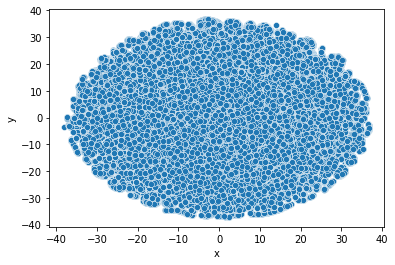

In [ ]:
snsTest = pd.DataFrame(tsne10p,columns=['x','y'])
sns.scatterplot(data=snsTest,x='x',y='y')

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(normal10p)
X_embeddedPCA = pca.transform(normal10p)

<AxesSubplot:xlabel='x', ylabel='y'>

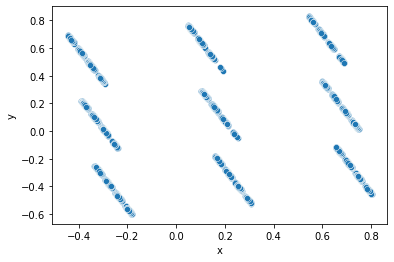

In [23]:
snsTest = pd.DataFrame(X_embeddedPCA,columns=['x','y'])
sns.scatterplot(data=snsTest,x='x',y='y')

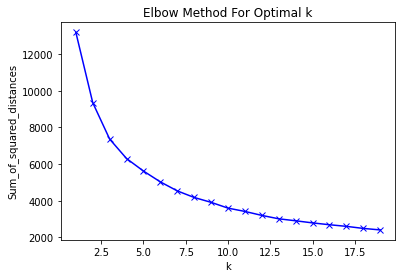

In [30]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k,random_state = 1)
    km = km.fit(normal10p)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

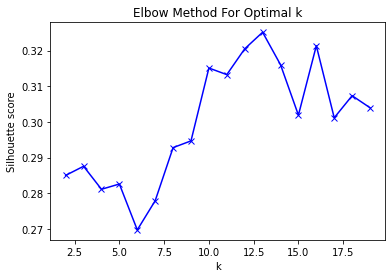

In [34]:
from sklearn import metrics
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
  kmeans = KMeans(n_clusters=k,random_state = 1)
  kmeans.fit(normal10p)
  y_kmeans = kmeans.predict(normal10p)
  Sum_of_squared_distances.append(metrics.silhouette_score(normal10p, y_kmeans))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
df22 = pd.read_csv("host_train.csv")
from sklearn.preprocessing import LabelEncoder
cats = [c for c in df22.columns if df22[c].dtypes=='object']
for col in cats:
    le = LabelEncoder() 
    df22[col]  = le.fit_transform(df22[col].astype(str)) 
    
le = LabelEncoder()
df22.Stay_Days = le.fit_transform(df22.Stay_Days.astype(str))
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
tenP22 = df22.sample(frac=0.1, random_state=1)
tenP22.head()

{'0': 0, '1': 1, '10': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10}


,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
53595,53596,9,3,5,2,2,2,3,5,2.0,5852,9.0,1,2,4,8,5034.0,6
240648,240649,26,1,2,1,4,2,1,3,3.0,111404,8.0,2,2,7,7,6453.0,9
56857,56858,6,0,6,0,4,2,2,5,2.0,62806,2.0,1,2,2,3,3949.0,3
57199,57200,12,0,9,1,2,2,3,1,4.0,51682,5.0,0,2,4,3,4802.0,4
257121,257122,15,2,5,2,5,2,0,5,2.0,2965,4.0,0,2,2,2,4395.0,0


In [7]:
tenP22['Stay_Days'].to_csv('staydays.csv',index=False);

In [38]:
tenP.head()

,Available_Extra_Rooms_in_Hospital,Bed_Grade,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit
53595,2,2.0,1,0,4,8,5034.0
240648,4,3.0,2,0,7,7,6453.0
56857,4,2.0,1,0,2,3,3949.0
57199,2,4.0,0,0,4,3,4802.0
257121,5,2.0,0,0,2,2,4395.0


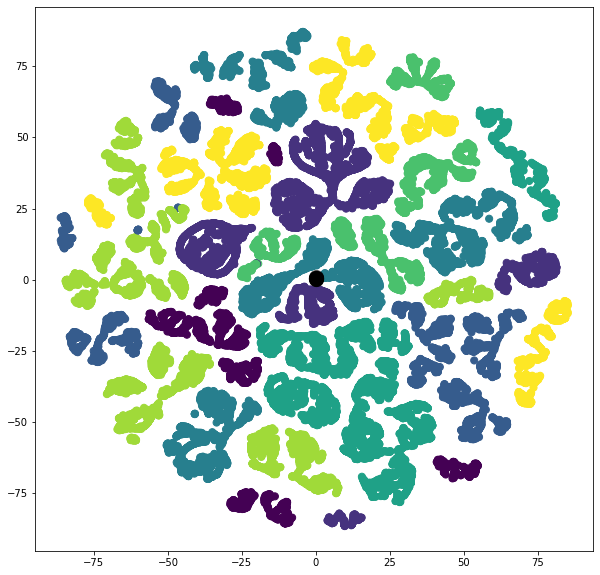

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(normal10p)
y_kmeans = kmeans.predict(normal10p)
tenP22n8 = tenP22
tenP22n8['clusters'] = y_kmeans
tenP22n8.to_csv('tenPn8Kmeans.csv')
plt.figure(figsize=(10,10))
plt.scatter(X_embedded10p[:, 0], X_embedded10p[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

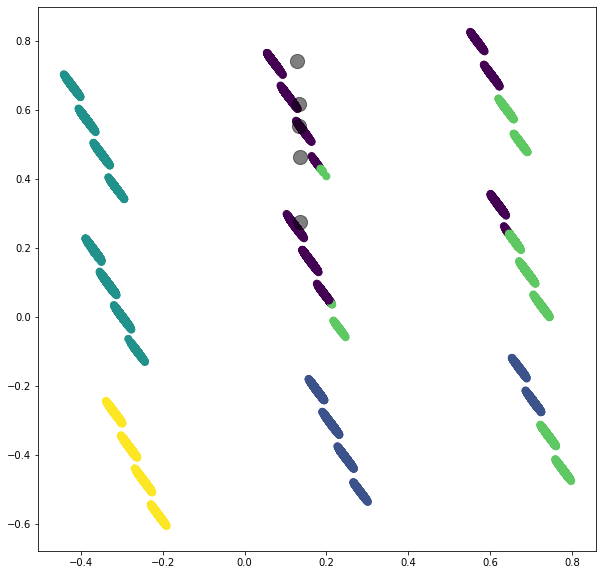

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_embeddedPCA[:, 0], X_embeddedPCA[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
df['x'] = Tsne['x']
df['y'] = Tsne['y']
df.head()

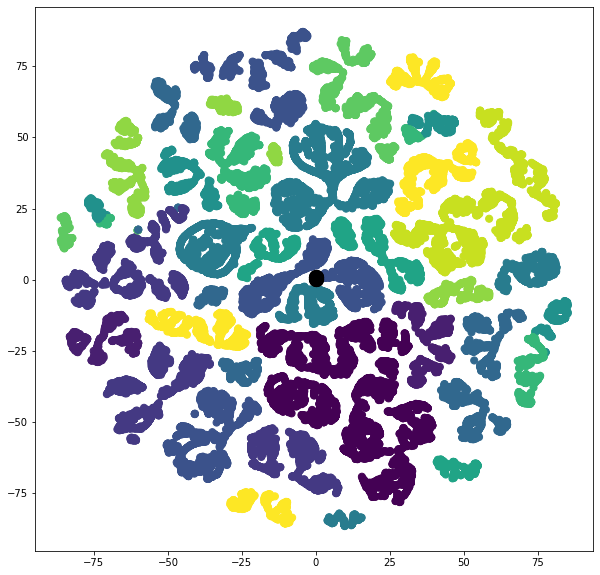

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=13)
kmeans.fit(normal10p)
y_kmeans = kmeans.predict(normal10p)
tenP22n13 = tenP22
tenP22n13['clusters'] = y_kmeans
tenP22n13.to_csv('tenPn13Kmeans.csv')
plt.figure(figsize=(10,10))
plt.scatter(X_embedded10p[:, 0], X_embedded10p[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
predict = y_kmeans

In [ ]:
ans = df 
ans['kmeans_clust'] = predict 

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k,random_state = 1)
    km = km.fit(normal)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, linkage = "complete",n_clusters=None)
model.fit(normal)
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

avg = AgglomerativeClustering(linkage = "average",n_clusters=13)
avg.fit(normal10p)
avgH = avg.fit_predict(normal10p)
print(metrics.silhouette_score(normal10p, avgH))

com = AgglomerativeClustering(linkage = "complete",n_clusters=13)
com.fit(normal10p)
avgC = com.fit_predict(normal10p)
print(metrics.silhouette_score(normal10p, avgC))

ward = AgglomerativeClustering(linkage = "ward",n_clusters=13)
ward.fit(normal10p)
avgW = ward.fit_predict(normal10p)
print(metrics.silhouette_score(normal10p, avgW))

single = AgglomerativeClustering(linkage = "single",n_clusters=13)
single.fit(normal10p)
avgS = single.fit_predict(normal10p)
print(metrics.silhouette_score(normal10p, avgS))

# kmeans = KMeans(n_clusters=4)
# kmeans.fit(normal10p)
# y_kmeans = kmeans.predict(normal10p)
# print(metrics.silhouette_score(normal10p, y_kmeans))

0.19626093147983054
0.13170953134901175
0.340611783651632
0.3042235121040217


In [29]:
df22 = pd.read_csv("host_train.csv")
tenP22 = df22.sample(frac=0.1, random_state=1)
tenP22.head()
tenP22n13aggloAVG = tenP22
tenP22n13aggloAVG['clusters'] = avgH
tenP22n13aggloAVG.to_csv('tenPn13aggloAVG.csv')

In [30]:
tenP22n13aggloCOMPLETE = tenP22
tenP22n13aggloCOMPLETE['clusters'] = avgC
tenP22n13aggloCOMPLETE.to_csv('tenPn13aggloCOMPLETE.csv')


In [31]:
tenP22n13aggloWARD = tenP22
tenP22n13aggloWARD['clusters'] = avgW
tenP22n13aggloWARD.to_csv('tenPn13aggloWARD.csv')


In [32]:
tenP22n13agglSINGLE = tenP22
tenP22n13agglSINGLE['clusters'] = avgS
tenP22n13agglSINGLE.to_csv('tenPn13aggloSINGLE.csv')

In [40]:
np.unique(avgS)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

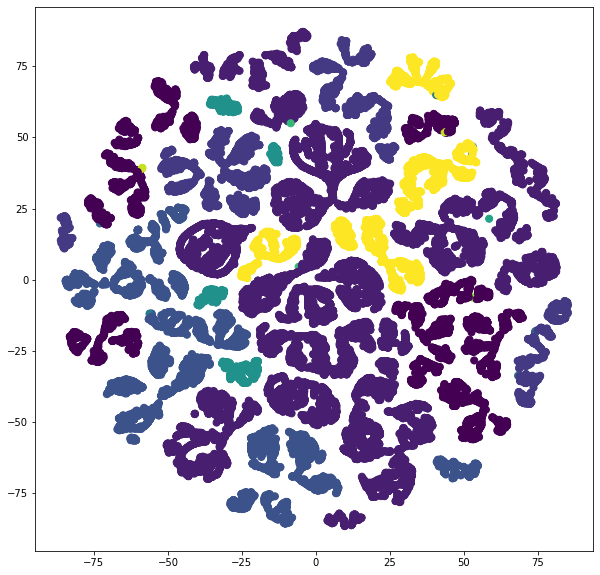

In [35]:

plt.figure(figsize=(10,10))
plt.scatter(X_embedded10p[:, 0], X_embedded10p[:, 1], c=avgH, s=50, cmap='viridis')

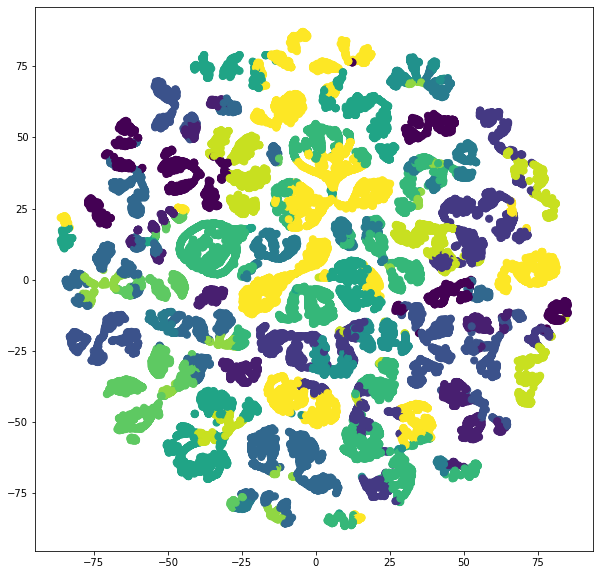

In [36]:

plt.figure(figsize=(10,10))
plt.scatter(X_embedded10p[:, 0], X_embedded10p[:, 1], c=avgC, s=50, cmap='viridis')

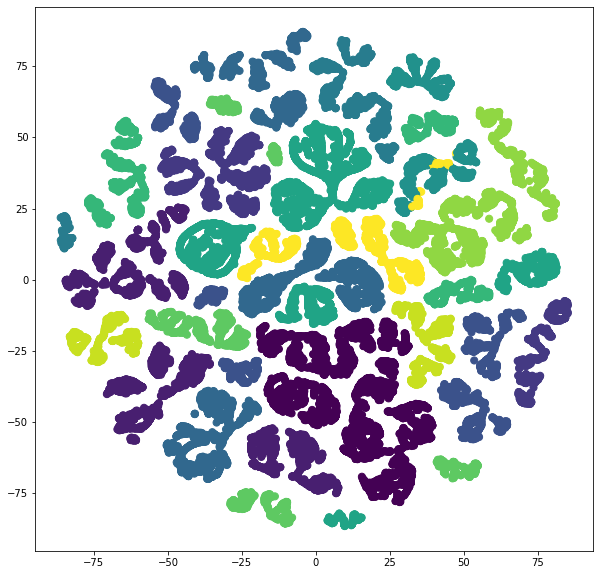

In [37]:

plt.figure(figsize=(10,10))
plt.scatter(X_embedded10p[:, 0], X_embedded10p[:, 1], c=avgW, s=50, cmap='viridis')

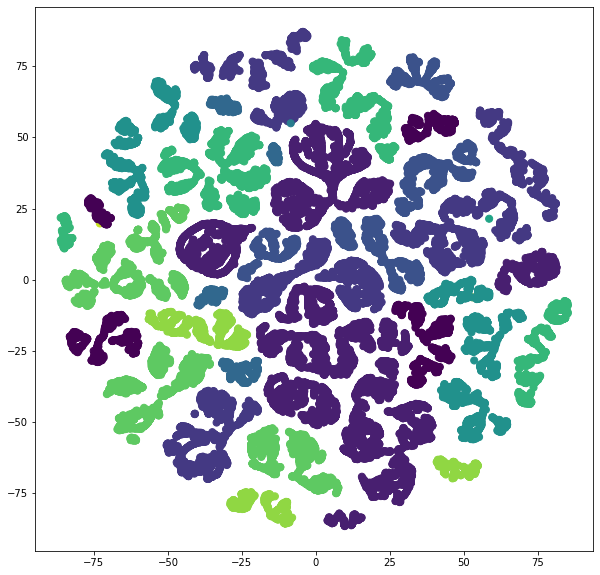

In [38]:

plt.figure(figsize=(10,10))
plt.scatter(X_embedded10p[:, 0], X_embedded10p[:, 1], c=avgS, s=50, cmap='viridis')